In [199]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Punto 1

In [200]:
df = pd.read_excel('Datos_Vivienda.xlsx', sheet_name='Datos Vivienda')
dim_df = df.shape
print(f"The dataset consists of {dim_df[0]} rows and {dim_df[1]} columns")

The dataset consists of 8322 rows and 12 columns


Let's check how much missing data there is by columns

In [201]:
# Missing values by column
df.isnull().sum()

Zona                     3
piso                  2638
Estrato                  3
precio_millon            2
Area_contruida           3
parqueaderos          1605
Banos                    3
Habitaciones             3
Tipo                     3
Barrio                   3
cordenada_longitud       3
Cordenada_latitud        3
dtype: int64

In [202]:
# delete records that have more than 6 missing data in their columns
df = df.dropna(thresh=len(df.columns)-6)

In [203]:
dim_df = df.shape
print(f"The dataset consists of {dim_df[0]} rows and {dim_df[1]} columns")

The dataset consists of 8319 rows and 12 columns


In [204]:
# Missing values by column
df.isnull().sum()

Zona                     0
piso                  2635
Estrato                  0
precio_millon            0
Area_contruida           0
parqueaderos          1602
Banos                    0
Habitaciones             0
Tipo                     0
Barrio                   0
cordenada_longitud       0
Cordenada_latitud        0
dtype: int64

Since the 'piso' and 'parqueaderos' attributes will not be used in this study, we eliminated the columns by having so much missing data, \% and 20\% respectively.

In [205]:
df.drop('piso', axis=1, inplace=True)
df.drop('parqueaderos', axis=1, inplace=True)

# Descriptive Statistics
Let's look at some graphs and measures of central tendency of our variables of interest.

In [206]:
df.describe()

,Estrato,precio_millon,Area_contruida,Banos,Habitaciones,cordenada_longitud,Cordenada_latitud
count,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000,8319.000000
mean,4.633610,433.904436,174.934938,3.111311,3.605361,-76.528606,3.417644
std,1.029222,328.665025,142.964126,1.428210,1.459537,0.017398,0.042638
min,3.000000,58.000000,30.000000,0.000000,0.000000,-76.589150,3.333000
25%,4.000000,220.000000,80.000000,2.000000,3.000000,-76.541580,3.380795
50%,5.000000,330.000000,123.000000,3.000000,3.000000,-76.530000,3.416000
75%,5.000000,540.000000,229.000000,4.000000,4.000000,-76.518890,3.452000
max,6.000000,1999.000000,1745.000000,10.000000,10.000000,-76.463000,3.497700


In [207]:
#Separate attributes by type
obj_attributes = df.select_dtypes(include=['object']).columns.to_list()
float_attributes = df.select_dtypes(include=['float']).columns.to_list()

# Bar Diagrams and Pie Diagram

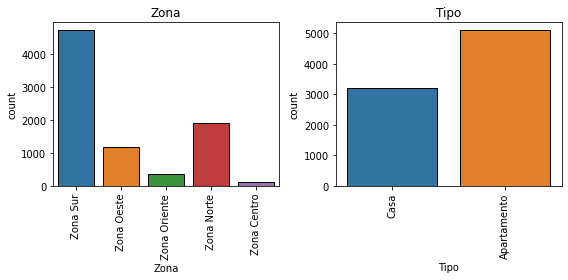

In [208]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs = axs.ravel()

for i, col in enumerate(obj_attributes):
  if col != 'Barrio':
    sns.countplot(x=col, data=df, ax=axs[i], edgecolor='black')
    axs[i].set_title(col)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Let's see the proportion of neighborhoods in the dataset.

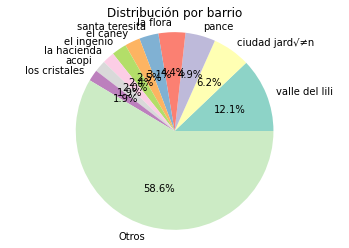

In [209]:
from matplotlib.colors import ListedColormap

# Obtain the housing count by neighborhood
count_by_barrio = df['Barrio'].value_counts()

# Create labels
labels_ = count_by_barrio.index[:10].tolist()

# Calculate the sum of the smallest values and add it to the list of labels
sum_low_values = count_by_barrio.iloc[10:].sum()
labels_.append('Otros')

# Create pie chart
fig = plt.figure(facecolor='white')
colores = sns.color_palette("Set3", n_colors=11)
paleta_colores = ListedColormap(colores)
plt.pie(count_by_barrio[:10].tolist() + [sum_low_values], labels=labels_, autopct='%1.1f%%', colors=paleta_colores.colors)
plt.axis('equal')
plt.title('Distribución por barrio')
plt.show()

# Histograms

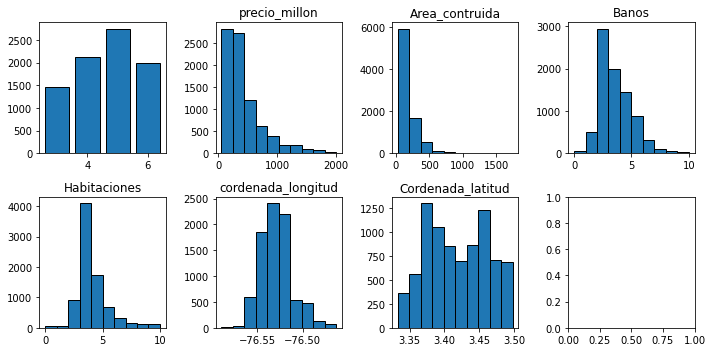

In [210]:
fig, axs = plt.subplots(2, 4, figsize=(10,5))
axs = axs[:8].ravel()

for i, col in enumerate(float_attributes):
    if col != 'Estrato':
        axs[i].hist(df[col], edgecolor='black')
        axs[i].set_title(col)
    else:
        axs[i].bar(df[col].value_counts().index, df[col].value_counts().values, edgecolor='black')

plt.tight_layout()
plt.show()

# Box Plots

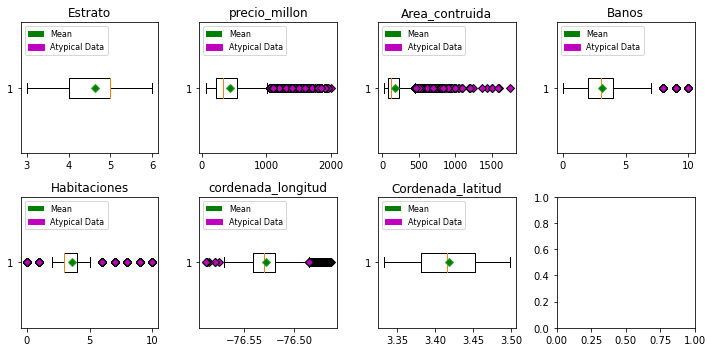

In [211]:
import matplotlib.patches as mpatches

fliers = dict(markerfacecolor='m', marker='D') #atypical data
mean_ = dict(markerfacecolor='green', marker='D')
mean_artist = mpatches.Patch(facecolor='green', label='Mean')
ad_artist = mpatches.Patch(color='m', label='Atypical Data')

fig, axs = plt.subplots(2, 4, figsize=(10,5))
axs = axs[:8].ravel()
for i, col in enumerate(float_attributes):
  bp = axs[i].boxplot(df[col], vert=False, flierprops=fliers, showmeans=True, meanprops=mean_)
  axs[i].legend(handles=[mean_artist, ad_artist], loc='upper left', fontsize=8)
  axs[i].set_title(col)

plt.tight_layout()
plt.show()

# Correlation

<Axes: >

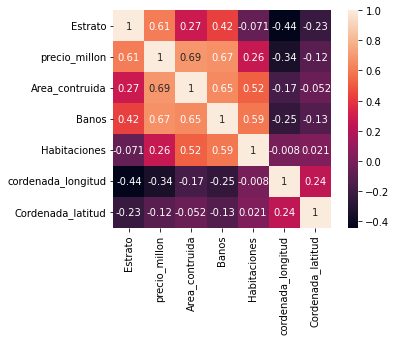

In [212]:
sns.heatmap(df.corr(), square=True, annot=True)

As can be seen in the correlation table, the variables 'Area_contruida' and 'precio_millon' have a direct positive relationship, of approximately 0.7

# Simple Linear Regression (precio_millon - Area_contruida)

In [213]:
df_el_ingenio = df[df['Barrio'] == 'el ingenio'][['precio_millon', 'Area_contruida']]
df_el_ingenio

,precio_millon,Area_contruida
36,1450.0,1200.0
122,290.0,100.0
220,360.0,99.0
581,550.0,197.0
2396,410.0,136.0
...,...,...
6516,176.0,83.0
6894,980.0,750.0
7436,395.0,300.0
7462,230.0,85.0


In [214]:
# Create the SLR model
modelo = smf.ols('precio_millon ~ Area_contruida', data=df_el_ingenio).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          precio_millon   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     684.2
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.80e-66
Time:                        17:39:20   Log-Likelihood:                -1226.1
No. Observations:                 202   AIC:                             2456.
Df Residuals:                     200   BIC:                             2463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        195.7150     11.639     16.

The SLR model is given by:

$$ Y = 1.21 X + 195.71 $$

Where $Y$ is 'precio_millon' and 'X' is 'Area_contruida'. The R-squared value of the model is approximately 0.78, which indicates that the proportion of the variability in the dependent variable is well explained by the independent variable. We can see that the standard error for both the intercept and the slope are small so the coefficients are accurate.

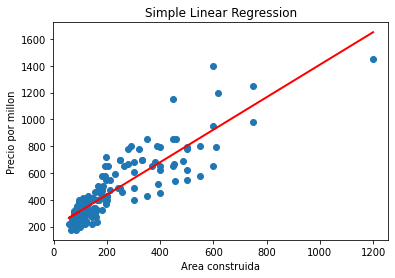

In [215]:
plt.scatter(df_el_ingenio.Area_contruida, df_el_ingenio.precio_millon)
plt.plot(df_el_ingenio.Area_contruida, modelo.predict(), color='red', linewidth=2)
plt.xlabel('Area construida')
plt.ylabel('Precio por millon')
plt.title('Simple Linear Regression')
plt.show()

# Check model assumptions

Normality of residuals

In [216]:
from scipy.stats import shapiro
residuos = modelo.resid
stat, p = shapiro(residuos)
print('Estadística de prueba:', stat)
print('Valor p:', p)
if p <= 0.05: print("Se rechaza H0")
else: print("No se rechaza H0")

Estadística de prueba: 0.9449506402015686
Valor p: 5.659239832311869e-07
Se rechaza H0


Since the null hypothesis is rejected, the residuals are not from a normal distribution.

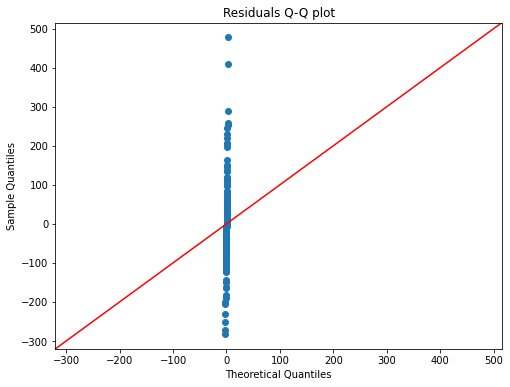

In [217]:
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuos, line='45', ax=ax)
ax.set_title('Residuals Q-Q plot')
plt.show()

Graph of residuals

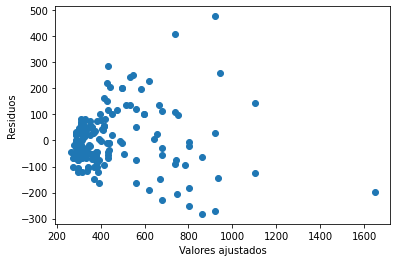

In [218]:
# Gráfico de residuos vs ajustados (para evaluar la linealidad de la relación entre las variables)
plt.scatter(modelo.fittedvalues, residuos)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.show()

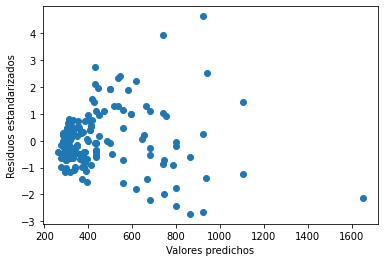

In [219]:
# Gráfico de residuos estandarizados vs ajustados (para evaluar la homocedasticidad de los residuos)
predicciones = modelo.predict()
residuos_estandarizados = modelo.get_influence().resid_studentized_internal
plt.scatter(predicciones, residuos_estandarizados)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos estandarizados')
plt.show()

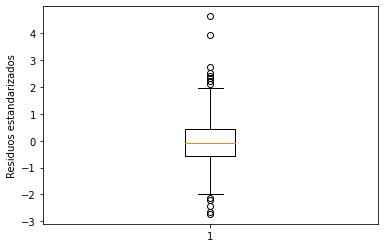

In [220]:
# Gráfico de caja de los residuos estandarizados
residuos_estandarizados = modelo.get_influence().resid_studentized_internal
plt.boxplot(residuos_estandarizados)
plt.ylabel('Residuos estandarizados')
plt.show()

eval_env: 1


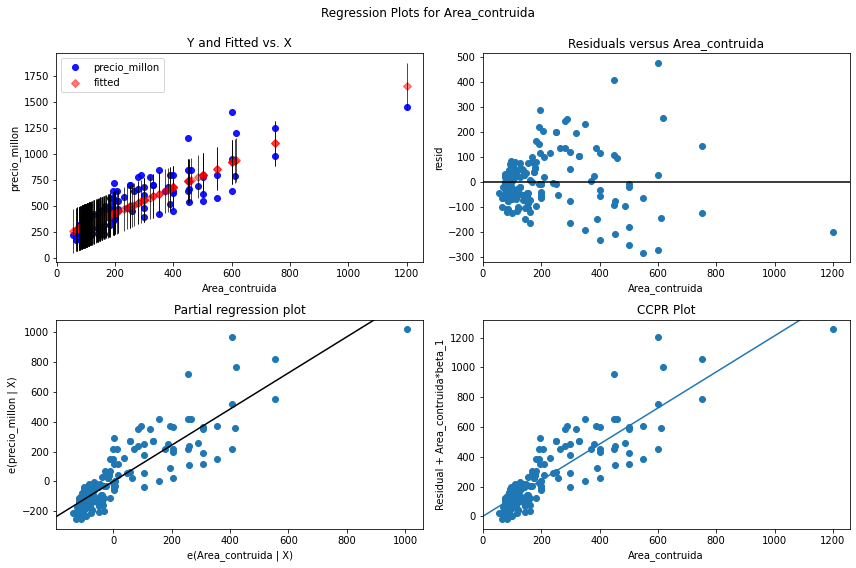

In [221]:
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(modelo,'Area_contruida', fig=fig)
plt.show()

Homoscedasticity of the residuals

In [222]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuos, modelo.model.exog)
print('Lagrange multiplier statistic:', lm)
print('p-value', lm_pvalue)
print('F value:', fvalue)
print('F p-value', f_pvalue)
if lm_pvalue <= 0.05: print("Se rechaza H0")
else: print("No se rechaza H0")

Lagrange multiplier statistic: 46.49553687988353
p-value 9.18273677648706e-12
F value: 59.79961725467512
F p-value 5.035974457263909e-13
Se rechaza H0


Since H0 is rejected, it means that there is sufficient evidence to conclude that the variance of the errors is not constant and, therefore, that there is heteroscedasticity in the model.

# Categorical Regression

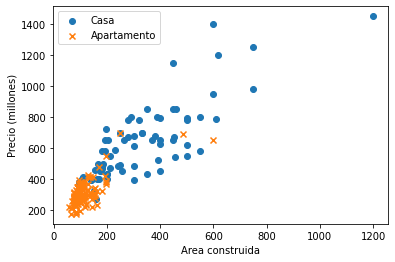

In [223]:
df2 = df[df['Barrio'] == 'el ingenio'][['precio_millon', 'Area_contruida', 'Tipo']]

df_casa = df2[df2['Tipo'] == 'Casa']
df_apto = df2[df2['Tipo'] == 'Apartamento']
plt.scatter(df_casa['Area_contruida'], df_casa['precio_millon'], marker='o', label='Casa')
plt.scatter(df_apto['Area_contruida'], df_apto['precio_millon'], marker='x', label='Apartamento')
# Configurar la gráfica
plt.xlabel('Area construida')
plt.ylabel('Precio (millones)')
plt.legend()
plt.show()

In this case, a model could have the following structure:
$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon $$
where $X_2$ can take the values of zero or one, according to the type of housing. For example:
$$ X_2 = \begin{cases}
0, & \text{si la vivienda es una casa.} \\
1, & \text{si la vivienda es un apartamento.}
\end{cases} $$


In [224]:
#Create the dummy column
df_el_ingenio['Tipo_Dummy'] = df2["Tipo"].map({"Casa": 0, "Apartamento": 1})
df_el_ingenio

,precio_millon,Area_contruida,Tipo_Dummy
36,1450.0,1200.0,0
122,290.0,100.0,1
220,360.0,99.0,1
581,550.0,197.0,1
2396,410.0,136.0,1
...,...,...,...
6516,176.0,83.0,1
6894,980.0,750.0,0
7436,395.0,300.0,0
7462,230.0,85.0,1


In [225]:
#df_dummies = pd.get_dummies(df2['Tipo'], prefix='Tipo')
#df_el_ingenio = pd.concat([df_el_ingenio, df_dummies], axis=1)


In [226]:
# Ajustar el modelo de regresión lineal
modelo2 = smf.ols(formula='precio_millon ~ Area_contruida + Tipo_Dummy', data=df_el_ingenio).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:          precio_millon   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     403.1
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.02e-70
Time:                        17:39:24   Log-Likelihood:                -1212.7
No. Observations:                 202   AIC:                             2431.
Df Residuals:                     199   BIC:                             2441.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        295.3695     21.659     13.

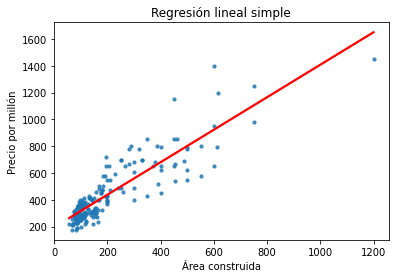

In [227]:
# Graficar el modelo
sns.regplot(x='Area_contruida', y='precio_millon', data=df_el_ingenio, ci=None, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Área construida')
plt.ylabel('Precio por millón')
plt.title('Regresión lineal simple')
plt.show()

We performed the ANOVA of the model

In [228]:
anova_results = sm.stats.anova_lm(modelo2, typ=2)
print(anova_results)

                      sum_sq     df           F        PR(>F)
Area_contruida  3.224499e+06    1.0  331.110433  3.268170e-44
Tipo_Dummy      2.763536e+05    1.0   28.377610  2.687289e-07
Residual        1.937949e+06  199.0         NaN           NaN


# Punto 2

In [229]:
data = pd.read_csv('datosME.txt', header=None, delim_whitespace=True, names=['Masa', 'Edad'])
#Center the data
x_mean = data['Edad'].mean()
data['xi'] = data['Edad'] - x_mean
data['xi2'] = data['xi']**2

In [230]:
modelo = smf.ols(formula='Masa ~ xi + np.power(xi, 2)', data=data).fit()

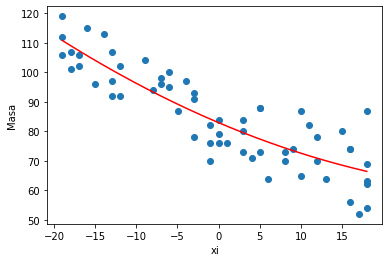

In [231]:
xi_range = np.linspace(data['xi'].min(), data['xi'].max(), 500)
y_pred = modelo.predict(exog=dict(xi=xi_range, xi2=xi_range**2))
plt.scatter(data['xi'], data['Masa'])
plt.plot(xi_range, y_pred, color='red')
plt.xlabel('xi')
plt.ylabel('Masa')
plt.show()

In [232]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Masa   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     91.84
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.48e-18
Time:                        17:39:25   Log-Likelihood:                -208.56
No. Observations:                  60   AIC:                             423.1
Df Residuals:                      57   BIC:                             429.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          82.9357      1.543     

The parameter xi is the coefficient associated with the independent variable xi, which is the centered age. The negative value of -1.1840 indicates that there is a negative relationship between age and mass. That is, as age increases, mass is expected to decrease by 1.1840 kg.

The parameter np.power(xi, 2) is the coefficient associated with the independent variable xi squared, which is age centered and squared. The value of 0.0148 indicates that there is a positive relationship between age and mass, but its p-value is 0.081, suggesting that it is not significant at the 0.05 significance level.

Let
$$H_0 : \text{the quadratic term of the model is 0} $$
$$H_1 : \text{the quadratic term of the model is different from 0} $$

If the p-value associated with the F-test is less than the chosen significance level ($\alpha=0.05$), then we reject the null hypothesis.

In [233]:
# Hypothesis test to eliminate the quadratic term
p_val = modelo.f_test("np.power(xi, 2) = 0").pvalue
print(p_val)
if p_val <= 0.05: print("Se rechaza H0")
else: print("No se rechaza H0")


0.08108689981613854
No se rechaza H0


It is concluded that there is not enough statistical evidence to claim that the quadratic term is important in the model. This means that the option of eliminating the quadratic term from the model can be considered.

<Axes: >

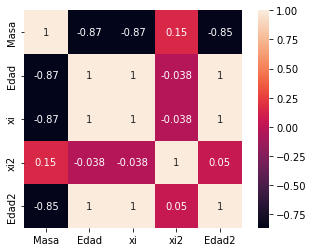

In [236]:
data['Edad2'] = data['Edad']**2
sns.heatmap(data.corr(), square=True, annot=True)

As can be seen in the correlation table, the variable Edad and Edad**2 are highly positively related. While centering the data and their respective square have a correlation close to zero (-0.038) indicating that there is no strong relationship between the two variables. Therefore, the transformation of the initial variable (centering the variable) is justified to eliminate the multicollinearity between the variable and its quadratic form.